In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img
import random
from os import listdir
from os.path import isfile, join
import keras.callbacks as kcall

Using TensorFlow backend.


In [2]:
# GPU config
# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#   except RuntimeError as e:
#     print(e)

In [3]:
train_dir = '../input/xray-covid19/train/'
test_dir = '../input/xray-covid19/test/'
labels = ['pneumonia', 'COVID-19', 'normal']
img_width, img_height, channels = 512, 512, 3
color_mode = 'rgb'
batch_size = 8
epochs = 10

In [4]:
datagen = ImageDataGenerator(
                    samplewise_center=True,
                    samplewise_std_normalization=True
                    )

train_generator = datagen.flow_from_directory(train_dir, target_size = (img_width, img_height), batch_size = batch_size, color_mode = color_mode, class_mode='categorical')
test_generator = datagen.flow_from_directory(test_dir, target_size = (img_width, img_height), batch_size = batch_size, color_mode = color_mode, class_mode='categorical')

train_size = 13897
test_size = 1579

Found 13897 images belonging to 3 classes.
Found 1579 images belonging to 3 classes.


In [5]:
from keras.applications import InceptionV3, ResNet50V2, DenseNet201
from keras.optimizers import Adam

inception = InceptionV3(
    include_top=True,
    weights=None,
    input_shape=(img_width, img_height, channels),
    classes=3
)

resNet = ResNet50V2(
    include_top=True,
    weights=None,
    input_shape=(img_width, img_height, channels),
    classes=3
)

denseNet = DenseNet201(
    include_top=True,
    weights=None,
    input_shape=(img_width, img_height, channels),
    classes=3
)

# incleption.summary()
# resNet.summary()
# denseNet.summary()
inception.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
resNet.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
denseNet.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
inception_history = inception.fit(train_generator,
        steps_per_epoch = train_size // batch_size,
        epochs = epochs,
        validation_data = test_generator)
        
resNet_history = resNet.fit(train_generator,
        steps_per_epoch = train_size // batch_size,
        epochs = epochs,
        validation_data = test_generator)

denseNet_history = denseNet.fit(train_generator,
        steps_per_epoch = train_size // batch_size,
        epochs = epochs,
        validation_data = test_generator)

Epoch 1/10
1737/1737 [==============================] - 713s 410ms/step - loss: 0.5852 - accuracy: 0.7779 - val_loss: 0.6853 - val_accuracy: 0.5522
Epoch 2/10
1737/1737 [==============================] - 666s 383ms/step - loss: 0.4795 - accuracy: 0.8206 - val_loss: 34.8625 - val_accuracy: 0.1248
Epoch 3/10
1737/1737 [==============================] - 668s 385ms/step - loss: 0.4229 - accuracy: 0.8461 - val_loss: 0.1092 - val_accuracy: 0.8290
Epoch 4/10
1737/1737 [==============================] - 670s 386ms/step - loss: 0.4003 - accuracy: 0.8559 - val_loss: 0.0656 - val_accuracy: 0.8550
Epoch 5/10
1737/1737 [==============================] - 690s 397ms/step - loss: 0.3753 - accuracy: 0.8684 - val_loss: 1.4281 - val_accuracy: 0.8588
Epoch 6/10
1737/1737 [==============================] - 669s 385ms/step - loss: 0.3512 - accuracy: 0.8732 - val_loss: 1.3666 - val_accuracy: 0.8562
Epoch 7/10
1737/1737 [==============================] - 667s 384ms/step - loss: 0.3274 - accuracy: 0.8818 - val

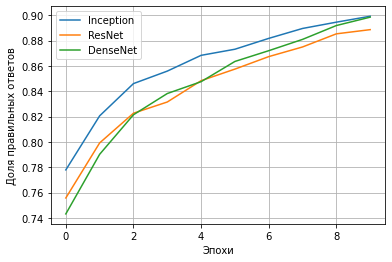

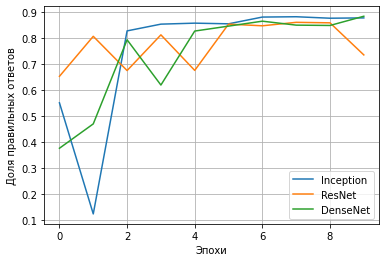

In [7]:
plt.grid(True)
plt.xlabel("Эпохи")
plt.ylabel("Доля правильных ответов")
plt.plot(inception_history.history['accuracy'])
plt.plot(resNet_history.history['accuracy'])
plt.plot(denseNet_history.history['accuracy'])
plt.legend(['Inception', 'ResNet', 'DenseNet'])
plt.savefig("train_accuracy.pdf")
plt.show()

plt.grid(True)
plt.xlabel("Эпохи")
plt.ylabel("Доля правильных ответов")
plt.plot(inception_history.history['val_accuracy'])
plt.plot(resNet_history.history['val_accuracy'])
plt.plot(denseNet_history.history['val_accuracy'])
plt.legend(['Inception', 'ResNet', 'DenseNet'])
plt.savefig("val_accuracy.pdf")
plt.show()

In [8]:
# #Evaluate the model's perfomance
# performance = model.evaluate_generator(test_generator)
# print("Loss on Test Set: %.2f" % (performance[0]))
# print("Accuracy on Test Set: %.2f" % (performance[1]*100))